In [32]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [7]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'
# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

['train', 'chest_xray', '__MACOSX', 'val', 'test']
1341
normal picture title:  IM-0596-0001.jpeg
pneumonia picture title: person1225_virus_2076.jpeg


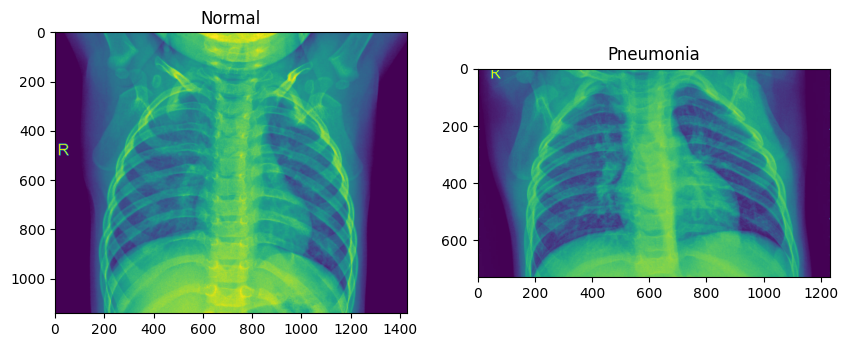

In [8]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')
val_set = test_datagen.flow_from_directory('./chest_xray/val',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Homework 3

In [15]:
num_classes = 1
num_detectors = 32
width, height = 64, 64

model = Sequential()

model.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', input_shape=(width, height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(2*num_detectors, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(GlobalAveragePooling2D())
model.add(Dense(2*num_detectors, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/home/ubuntu/ann/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,257 (94.75 KB)

 Trainable params: 23,937 (93.50 KB)

 Non-trainable params: 320 (1.25 KB)

# Homework 4

In [16]:
history = model.fit(
    training_set,
    batch_size=32,
    epochs=20,
    validation_data=val_set,
    shuffle=True,
    verbose=True
)

Epoch 1/20


/home/ubuntu/ann/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.7643 - loss: 0.4957 - val_accuracy: 0.5000 - val_loss: 4.8556
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - accuracy: 0.8541 - loss: 0.3452 - val_accuracy: 0.5000 - val_loss: 5.4315
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - accuracy: 0.8676 - loss: 0.3047 - val_accuracy: 0.5000 - val_loss: 1.9522
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - accuracy: 0.8744 - loss: 0.3018 - val_accuracy: 0.5625 - val_loss: 1.8469
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - accuracy: 0.8792 - loss: 0.2936 - val_accuracy: 0.5000 - val_loss: 1.6818
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - accuracy: 0.8845 - loss: 0.2718 - val_accuracy: 0.5000 - val_loss: 2.7548
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.8927 - loss: 0.2545 - val_accuracy: 0.5000 - val_loss: 1.5747
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - accuracy: 0.8826 - loss: 0.2754 - val

In [17]:
model.save('medical.h5')

In [25]:
# 예측 수행
test_set.reset()
predict = model.predict(test_set, steps=test_set.samples // test_set.batch_size + 1)
y_pred = [1 if x > 0.5 else 0 for x in predict]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step


In [26]:
# 실제 레이블 가져오기
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [27]:
# 분류 보고서
report = classification_report(true_classes, a, target_names=class_labels)
print("Classification Report")
print(report)

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.39      0.41      0.40       234
   PNEUMONIA       0.63      0.61      0.62       390

    accuracy                           0.54       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.54      0.54       624



# Homework 5

In [37]:
# 데이터프레임 생성
df = pd.DataFrame({
    'True Label': [class_labels[i] for i in true_classes],
    'Predicted Label': [class_labels[i] for i in y_pred]
})

# 데이터프레임 출력
df.head(30)

,True Label,Predicted Label
0,NORMAL,PNEUMONIA
1,NORMAL,PNEUMONIA
2,NORMAL,PNEUMONIA
3,NORMAL,PNEUMONIA
4,NORMAL,NORMAL
5,NORMAL,PNEUMONIA
6,NORMAL,PNEUMONIA
7,NORMAL,PNEUMONIA
8,NORMAL,PNEUMONIA
9,NORMAL,NORMAL


# Homework 6

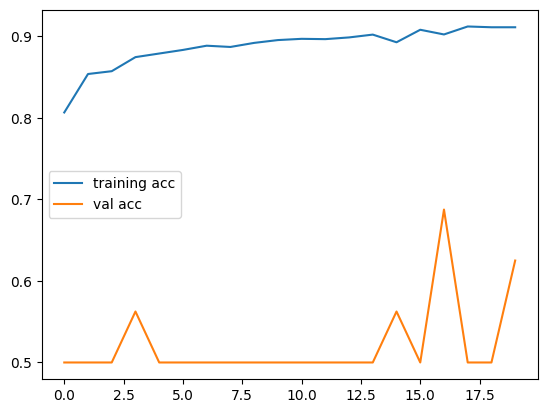

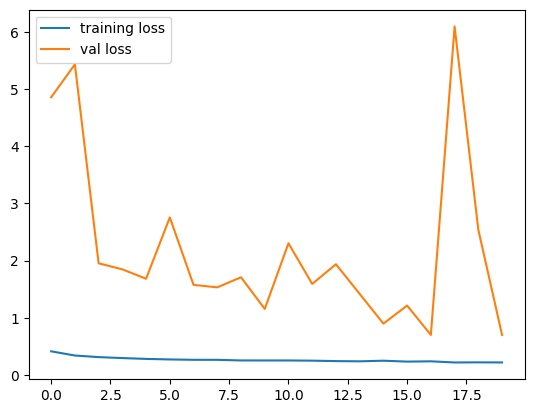

In [30]:
# 학습 성능 그래프 그리기
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='val acc')
    plt.legend();
    plt.figure();

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='val loss')
    plt.legend();

plot_learning_curve(history)